## Feature Selection Results ##

*** Description of Notebook: ***

In this notebook, I conduct several methods of feature selection. These methods include both supervised and unsupervised approaches. I've used only a sample of the data to conduct feature selection, as the dataset is too large to run this methods on the full 200,000 rows.

Contents:
1. Data Import
2. Unsupervised Approach
    - Looked at correlation (.corr()) between features and returned those features that are highly correlated ( > 0.5) with at least one other feature.
    - The result was 20 features: 
        - 'feat_257', 'feat_269', 'feat_308', 'feat_315', 'feat_336', 'feat_341', 'feat_395', 'feat_504', 'feat_526', 'feat_639', 'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867', 'feat_920', 'feat_956'
    - Visualizations of those 20 features
3. Supervised Approaches
    - Select from Model w/ Logistic Regression (L2 penalty)
    - Select from Model w/ Logistic Regression (L1 penalty)
    - SelectKBest w/ k = 20
    - RFE w/ RandomForestClassifier as estimator
    - These approaches all gave me various feature importances and coefficients with little consistency across them.
    
**Results:** I decided to use the 20 features gained from the correlation approach. Given that I know the madelon data has 20 important (or redundant) features and 480 noise, I felt comfortable with the approach that produced exactly 20 features.

## Feature Selection Code ##

In [1]:
% run __init__.py

** Data Import**

In [3]:
cd ..

/home/jovyan/Documents/GA_DSI/Projects/project_3


In [5]:
df = pd.read_pickle('data/cook_df_sample.p')

** Subsetting and Subset Analysis **

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7149281d68>]], dtype=object)

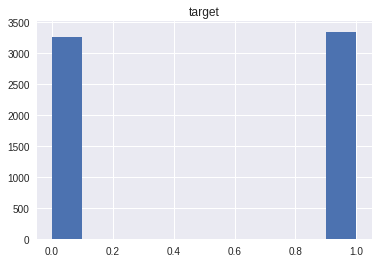

In [6]:
df.hist(column = 'target')

In [7]:
df['target'].value_counts()

1    3346
0    3254
Name: target, dtype: int64

In [8]:
base_1 = df['target'].sum()/len(df['target'])
print(base_1)

0.50696969697


In [9]:
base_0 = 1-base_1
print(base_0)

0.49303030303


In [10]:
df.shape

(6600, 1001)

In [11]:
predictors = df[df.columns[0:1000]]
target = df[df.columns[1000]]

In [12]:
predictors.shape

(6600, 1000)

In [13]:
target.shape

(6600,)

## Feature Selection - Unsupervised Methods ##

In [14]:
predictors_corr = predictors.corr()
predictors_corr.shape

(1000, 1000)

In [15]:
predictors_corr.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_990,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999
feat_000,1.000000,-0.004049,0.014552,0.013327,-0.000612,0.013378,0.007627,-0.013010,-0.000849,-0.013826,...,0.004069,0.001522,-0.007360,-0.014924,-0.005591,0.017006,-0.026438,0.015010,-0.017877,0.014493
feat_001,-0.004049,1.000000,0.005254,-0.008655,-0.016908,-0.005749,-0.011090,0.003701,0.008304,-0.013193,...,0.000363,-0.007762,0.008594,-0.019053,-0.010545,-0.005059,-0.000061,0.000426,0.025299,0.004287
feat_002,0.014552,0.005254,1.000000,-0.002558,0.003881,0.003579,-0.012244,-0.004357,0.008967,-0.009656,...,-0.003368,-0.015280,0.001635,0.003662,0.008094,-0.010744,-0.010042,0.009989,0.006679,-0.014670
feat_003,0.013327,-0.008655,-0.002558,1.000000,-0.012197,0.011473,0.017549,0.010104,-0.004330,0.004900,...,-0.002896,-0.042065,-0.009918,-0.014508,0.005031,0.026013,-0.004576,0.015088,-0.005525,-0.006991
feat_004,-0.000612,-0.016908,0.003881,-0.012197,1.000000,-0.005350,-0.012259,0.008824,0.002389,-0.000199,...,-0.004387,0.024601,-0.007324,0.014042,-0.013826,-0.005329,0.009426,-0.021753,-0.000445,-0.001359


** Feature Correlation: **
Selecting features that are highly correlated with other features and storing the indexes. 
1. First line sets the threshold for 'highly correlated'. 
2. Second line makes sure it's identifying those features that are highly correlated to at least 2 features (itself and 1 other). 
3. Third line stores those indexes to a list.

In [16]:
hi_corrs = predictors_corr.abs() > .5
hi_count = predictors_corr[hi_corrs].count() > 1
top_corrs = list(predictors_corr[hi_count].index)

In [17]:
len(top_corrs)

20

In [18]:
print(top_corrs)

['feat_257', 'feat_269', 'feat_308', 'feat_315', 'feat_336', 'feat_341', 'feat_395', 'feat_504', 'feat_526', 'feat_639', 'feat_681', 'feat_701', 'feat_724', 'feat_736', 'feat_769', 'feat_808', 'feat_829', 'feat_867', 'feat_920', 'feat_956']


In [19]:
predictors_trim = predictors[top_corrs]
predictors_trim.shape

(6600, 20)

Now that we have our 20 features, I've provided some visualizations

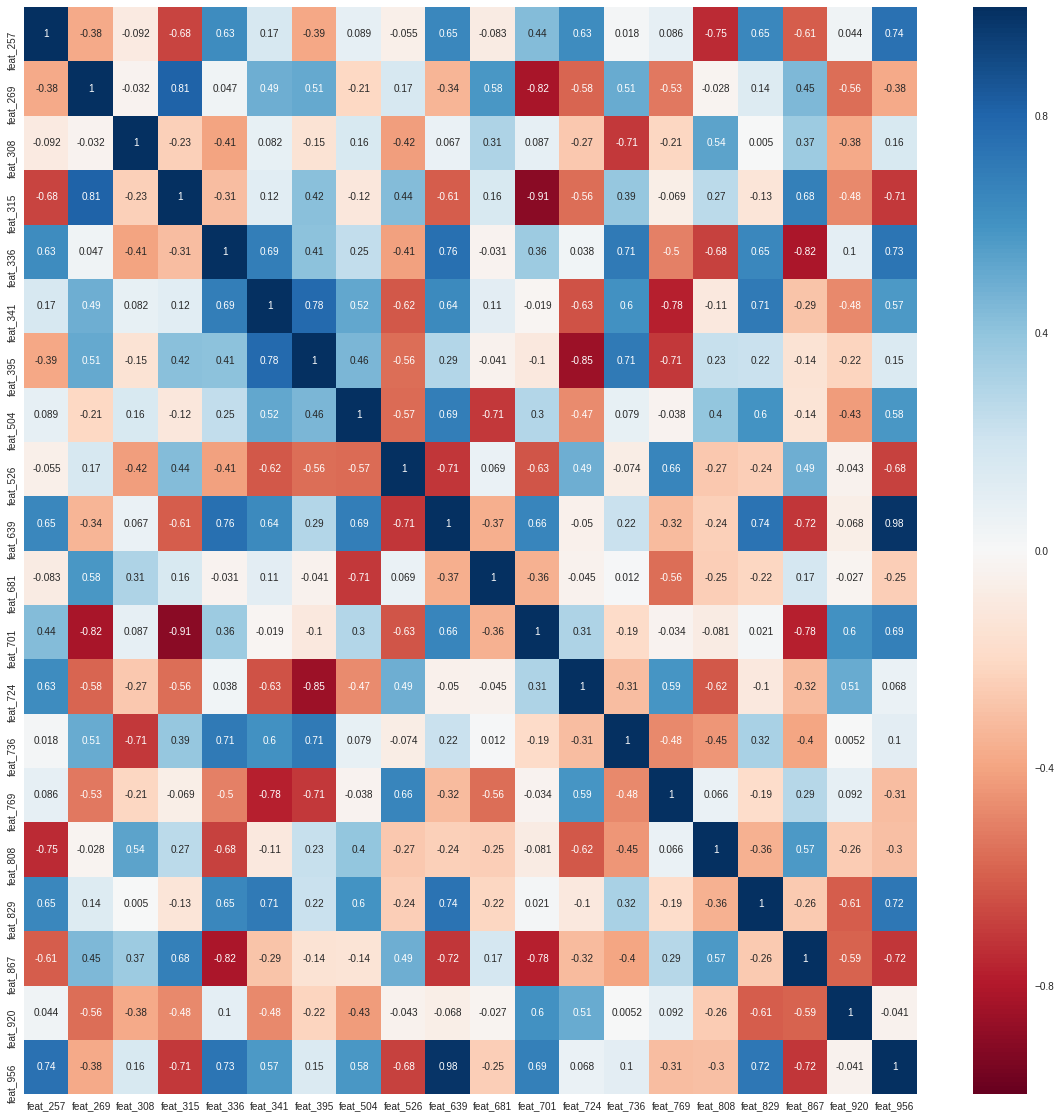

In [20]:
predictors_trim_corr = predictors_trim.corr()
plt.figure(figsize = (20,20))
sns.heatmap(predictors_trim_corr, cmap = 'RdBu', annot = True)

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


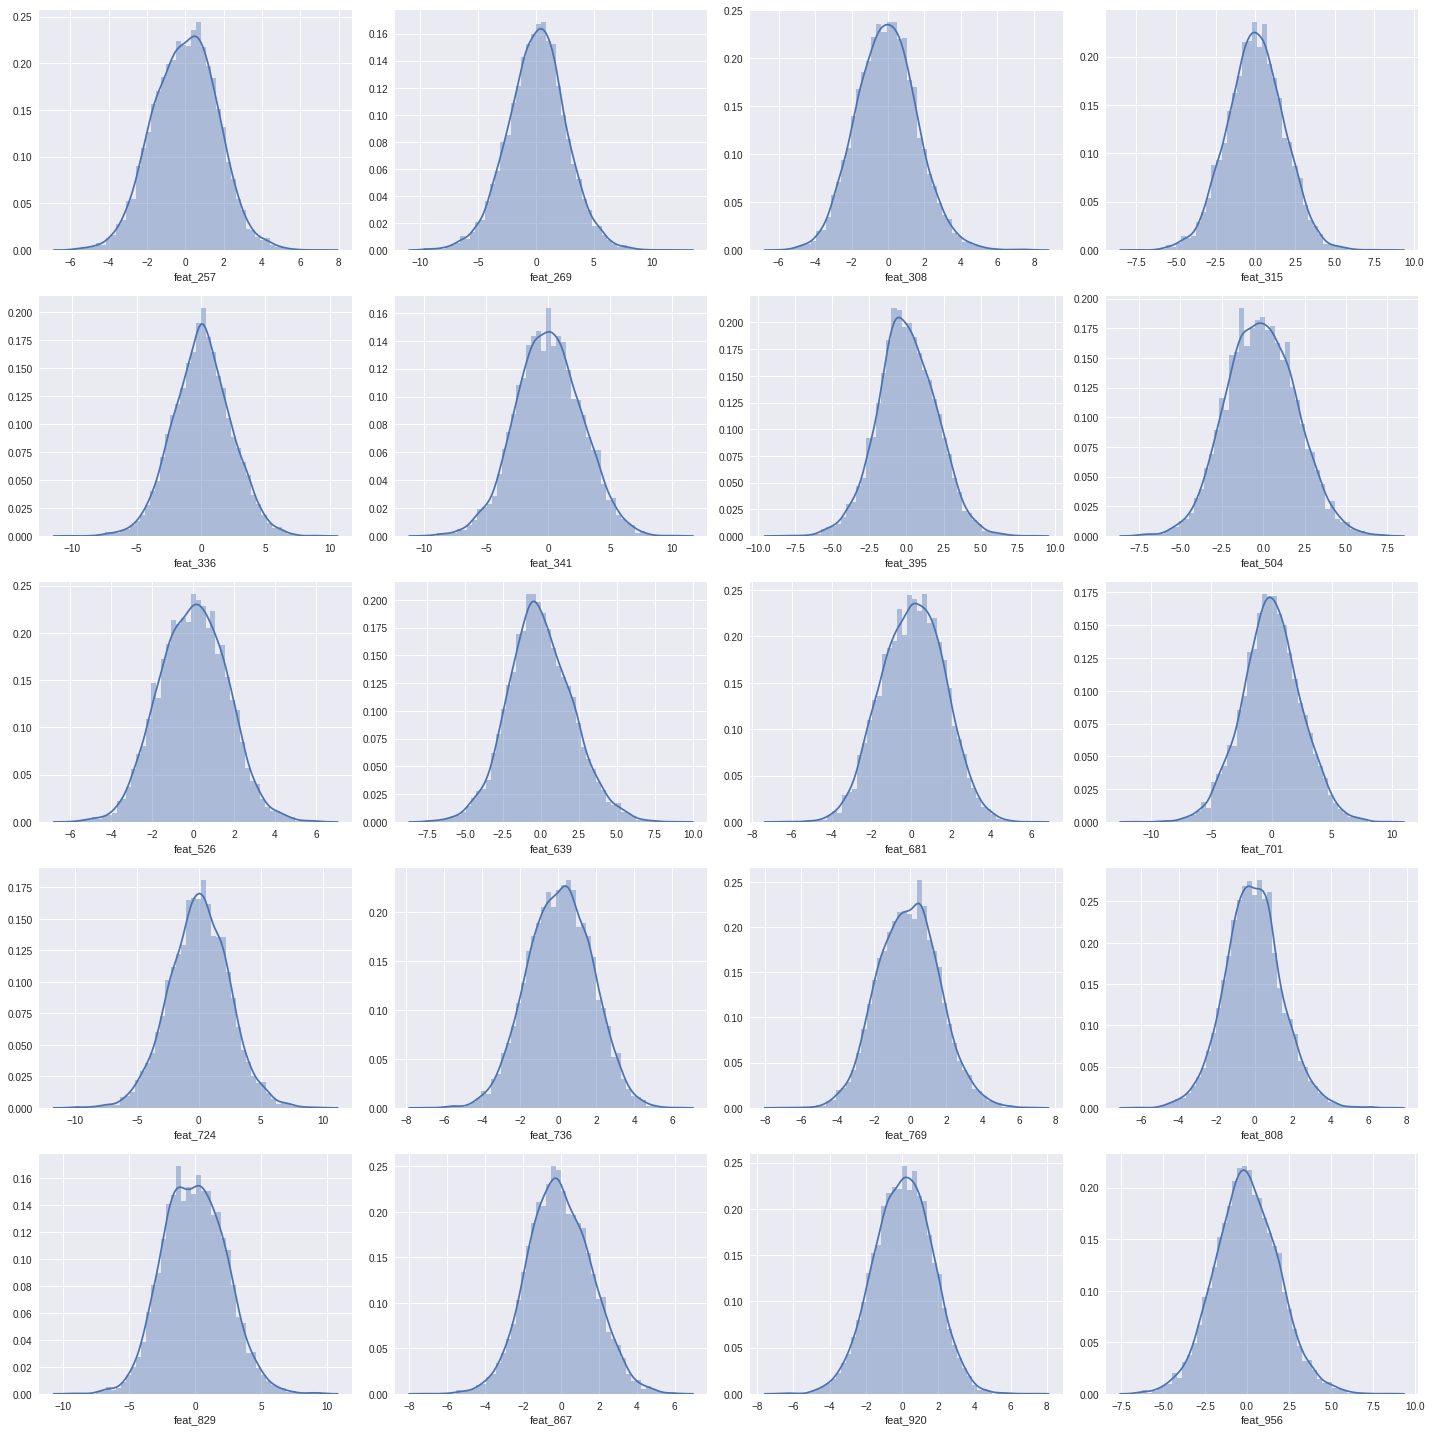

In [21]:
fig = plt.figure(figsize = (20,20))

for i, col in enumerate(predictors_trim.columns):
    fig.add_subplot(5,4,1+i)
    sns.distplot(predictors_trim[col])
    
    
fig.tight_layout()
fig.show()

In [22]:
predictors_trim['target'] = target

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
elite_cook_df = predictors_trim.copy()

In [29]:
top_feats = pd.DataFrame(top_corrs)

In [32]:
top_feats.to_pickle('data/twenty_feats.p')